In [42]:
#import all datsets
import pandas as pd
import matplotlib.pyplot as plt
import string
import warnings
import itertools
import seaborn as sns
import numpy as np
from collections import defaultdict
from statistics import mean
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [43]:
#import the csv file
df = pd.read_csv('df_full_mx_immigration.csv')
df.head()

,Unnamed: 0,DATE,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,...,MEXICO_INFLATION_ANNUAL_CHANGE,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change,Date,us_border_spending_in_millions,kt of CO2 equivalent,Annual % Change,UNAUTHORIZED_POP_ENTERED_US
0,1,1989,4.1055,2.82,3.6727,-0.50,16.0000,3.00,39.7,-1.13,...,-94.15,9628973.0,38647700.0,17.0000,4.00,1989,2000,473325.800,2.41,725193.437
1,2,1990,5.1758,1.07,1.8860,-1.79,17.2653,3.00,39.0,-1.13,...,6.64,4298014.0,23251026.0,17.2653,4.00,1990,263,494151.020,4.40,815876.000
2,3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,39.0,-1.13,...,-3.99,4804000.2,24291031.4,17.6910,2.47,1991,299,505174.028,2.23,648602.000
3,4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72,45.7,6.00,...,-7.15,5309986.4,25331036.8,19.0571,7.72,1992,326,494645.640,-2.08,558601.000
4,5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,39.0,-1.13,...,-5.76,5815972.6,26371042.2,18.0986,-5.03,1993,363,502121.057,1.51,556605.000


In [44]:
#get rid of extra column
df.columns

Index(['Unnamed: 0', 'DATE', 'Mex_GDP_Growth %', 'Mex_Annual_GDP_Change',
       'US_GDP_Growth %', 'US_Annual_GDP_Change', 'Mx_crimes_per_100k',
       'mx_annual_per_change_crimes', 'mx_%pov_Under_US_$5.50_Per_Day',
       'yearly_change_in_mx_pov_rate', 'MEXICO_TOTAL_KILOTONS_Co2',
       'MEXICO_MT_Co2_PER_CAPITA', 'MEXICO_INFLATION_RATE_PERCENTAGE',
       'MEXICO_INFLATION_ANNUAL_CHANGE',
       'Number_Migrant_origin_Mexico_Destination_US',
       'Number_Migrant_origin_World_Destination_US',
       'Mexico Murder_Per 100K Population', 'Mexico Murder_Annual % Change',
       'Date', 'us_border_spending_in_millions', 'kt of CO2 equivalent',
       'Annual % Change', 'UNAUTHORIZED_POP_ENTERED_US'],
      dtype='object')

In [45]:
df1=df[['Mex_GDP_Growth %', 'Mex_Annual_GDP_Change',
       'US_GDP_Growth %', 'US_Annual_GDP_Change', 'Mx_crimes_per_100k',
       'mx_annual_per_change_crimes', 'mx_%pov_Under_US_$5.50_Per_Day',
       'yearly_change_in_mx_pov_rate', 'MEXICO_TOTAL_KILOTONS_Co2',
       'MEXICO_MT_Co2_PER_CAPITA', 'MEXICO_INFLATION_RATE_PERCENTAGE',
       'MEXICO_INFLATION_ANNUAL_CHANGE',
       'Number_Migrant_origin_Mexico_Destination_US',
       'Number_Migrant_origin_World_Destination_US',
       'Mexico Murder_Per 100K Population', 'Mexico Murder_Annual % Change', 'us_border_spending_in_millions', 'kt of CO2 equivalent',
       'Annual % Change', 'UNAUTHORIZED_POP_ENTERED_US']]
df1.head()

,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change,us_border_spending_in_millions,kt of CO2 equivalent,Annual % Change,UNAUTHORIZED_POP_ENTERED_US
0,4.1055,2.82,3.6727,-0.50,16.0000,3.00,39.7,-1.13,361877.895,4.3934,20.0079,-94.15,9628973.0,38647700.0,17.0000,4.00,2000,473325.800,2.41,725193.437
1,5.1758,1.07,1.8860,-1.79,17.2653,3.00,39.0,-1.13,318427.612,3.7934,26.6517,6.64,4298014.0,23251026.0,17.2653,4.00,263,494151.020,4.40,815876.000
2,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,39.0,-1.13,331958.842,3.8820,22.6624,-3.99,4804000.2,24291031.4,17.6910,2.47,299,505174.028,2.23,648602.000
3,3.5411,-0.67,3.5224,3.63,19.0571,7.72,45.7,6.00,334698.091,3.8438,15.5079,-7.15,5309986.4,25331036.8,19.0571,7.72,326,494645.640,-2.08,558601.000
4,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,39.0,-1.13,339468.858,3.8304,9.7515,-5.76,5815972.6,26371042.2,18.0986,-5.03,363,502121.057,1.51,556605.000


In [46]:
#get dataframe shape
df1.shape

(31, 20)

In [47]:
#get df dimensions
df1.ndim

2

In [48]:
#get variable info
df1.describe()

,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change,us_border_spending_in_millions,kt of CO2 equivalent,Annual % Change,UNAUTHORIZED_POP_ENTERED_US
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01
mean,2.606068,-0.043548,2.507352,-0.065484,16.083335,3.073226,38.767742,-1.131613,419919.724387,4.076397,10.187626,-3.565484,9.589485e+06,3.826109e+07,16.147852,3.170000,1822.612903,594728.642531,1.579188,7.517892e+05
std,2.887597,4.273173,1.530061,1.650280,5.212616,16.209972,6.982186,4.249602,59244.927712,0.214108,9.336670,17.982846,2.377780e+06,8.411414e+06,5.217530,16.212306,1259.922529,66285.478973,7.053671,2.025426e+05
min,-6.291200,-11.230000,-2.536800,-3.130000,8.122200,-16.420000,22.700000,-9.600000,318427.612000,3.630900,2.720600,-94.150000,4.298014e+06,2.325103e+07,8.122200,-16.420000,263.000000,473325.800000,-20.000000,3.843140e+05
25%,1.693800,-1.645000,1.859150,-0.995000,11.710700,-6.940000,37.050000,-1.415000,365823.587000,3.928400,4.003350,-2.955000,8.119237e+06,3.163255e+07,11.710700,-6.940000,797.000000,535970.383000,0.329000,6.447164e+05
50%,2.849800,-0.520000,2.684300,-0.290000,16.625800,-0.750000,39.000000,-1.130000,419920.000000,4.070000,5.125000,-0.700000,1.037096e+07,3.864770e+07,17.000000,-0.750000,1515.000000,641308.820000,0.908669,7.251934e+05
75%,4.354950,1.495000,3.597550,0.715000,18.577850,4.520000,39.000000,-1.130000,479885.622000,4.227200,15.718150,0.190000,1.151544e+07,4.568186e+07,18.577850,4.520000,2807.000000,652107.126600,2.835000,8.141960e+05
max,6.846900,13.060000,4.753200,5.100000,29.071100,55.610000,61.400000,16.100000,496324.783000,4.455700,34.999300,28.030000,1.216866e+07,5.014204e+07,29.071100,55.610000,4286.000000,692323.180000,28.410000,1.389322e+06


In [49]:
#examine data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Mex_GDP_Growth %                             31 non-null     float64
 1   Mex_Annual_GDP_Change                        31 non-null     float64
 2   US_GDP_Growth %                              31 non-null     float64
 3   US_Annual_GDP_Change                         31 non-null     float64
 4   Mx_crimes_per_100k                           31 non-null     float64
 5   mx_annual_per_change_crimes                  31 non-null     float64
 6   mx_%pov_Under_US_$5.50_Per_Day               31 non-null     float64
 7   yearly_change_in_mx_pov_rate                 31 non-null     float64
 8   MEXICO_TOTAL_KILOTONS_Co2                    31 non-null     float64
 9   MEXICO_MT_Co2_PER_CAPITA                     31 non-null     float64
 10  MEXI

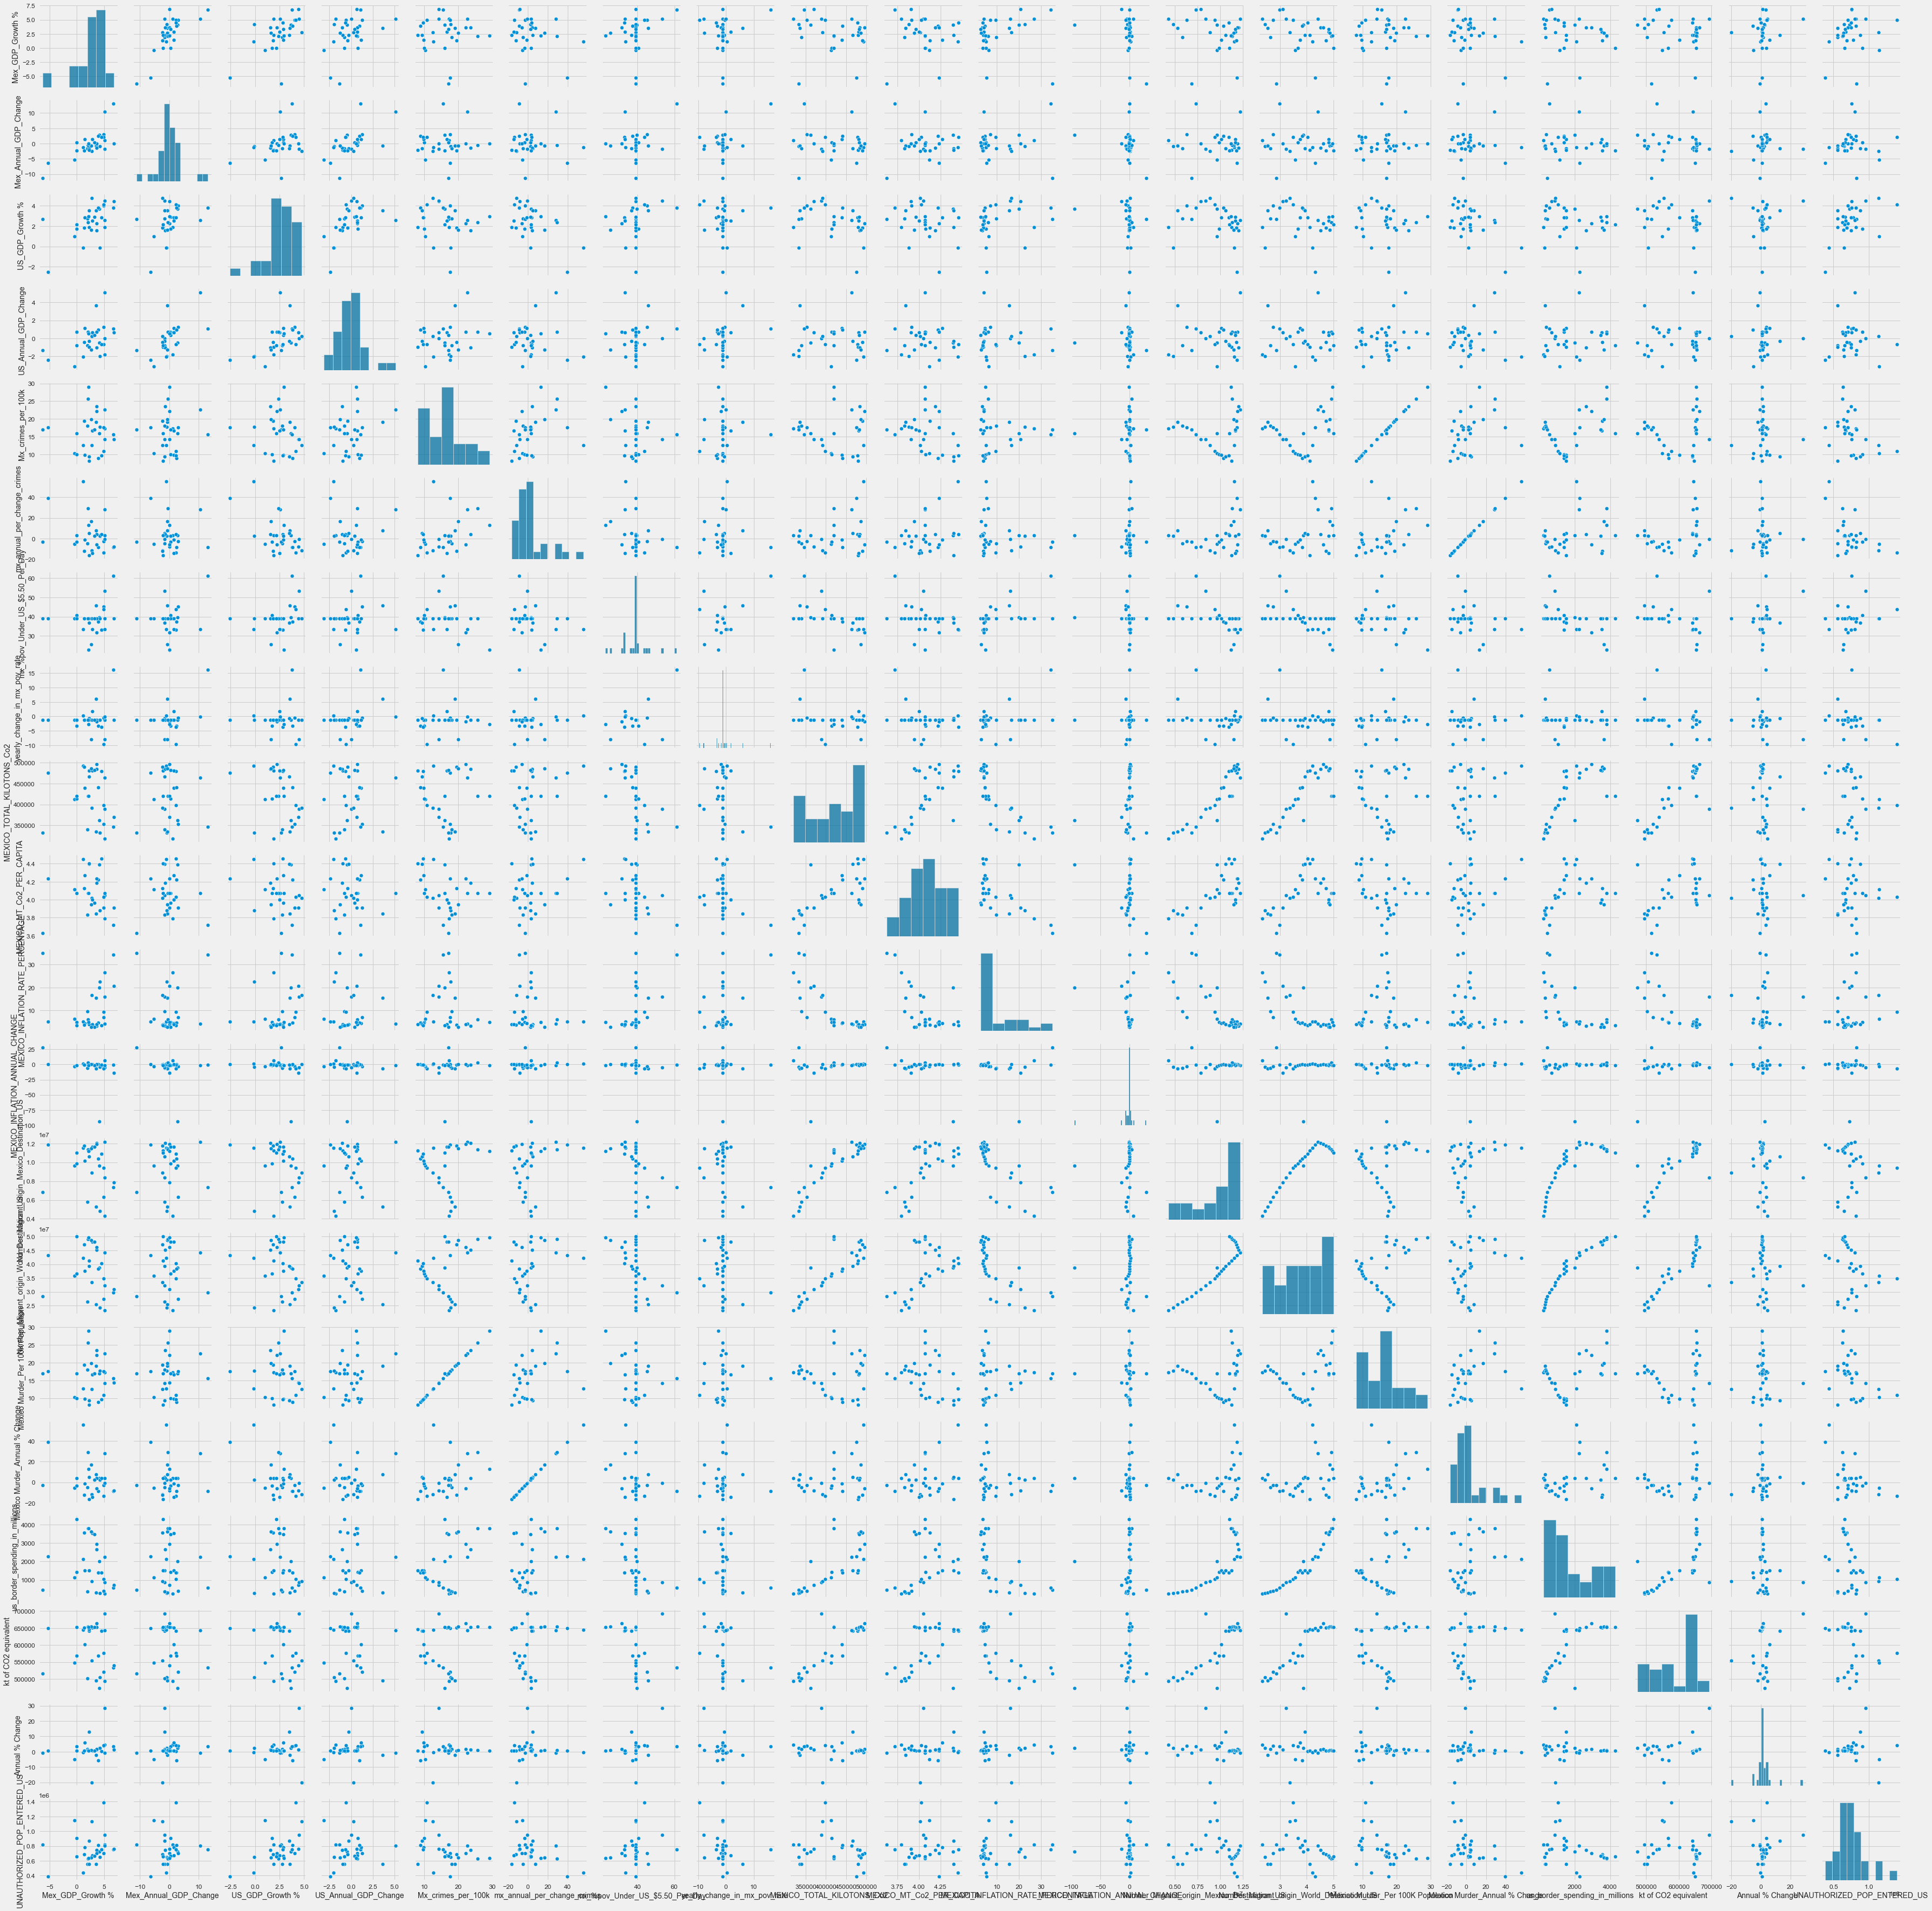

In [50]:
#Plot a pairplot to understand dataspread
sns.pairplot(df1)

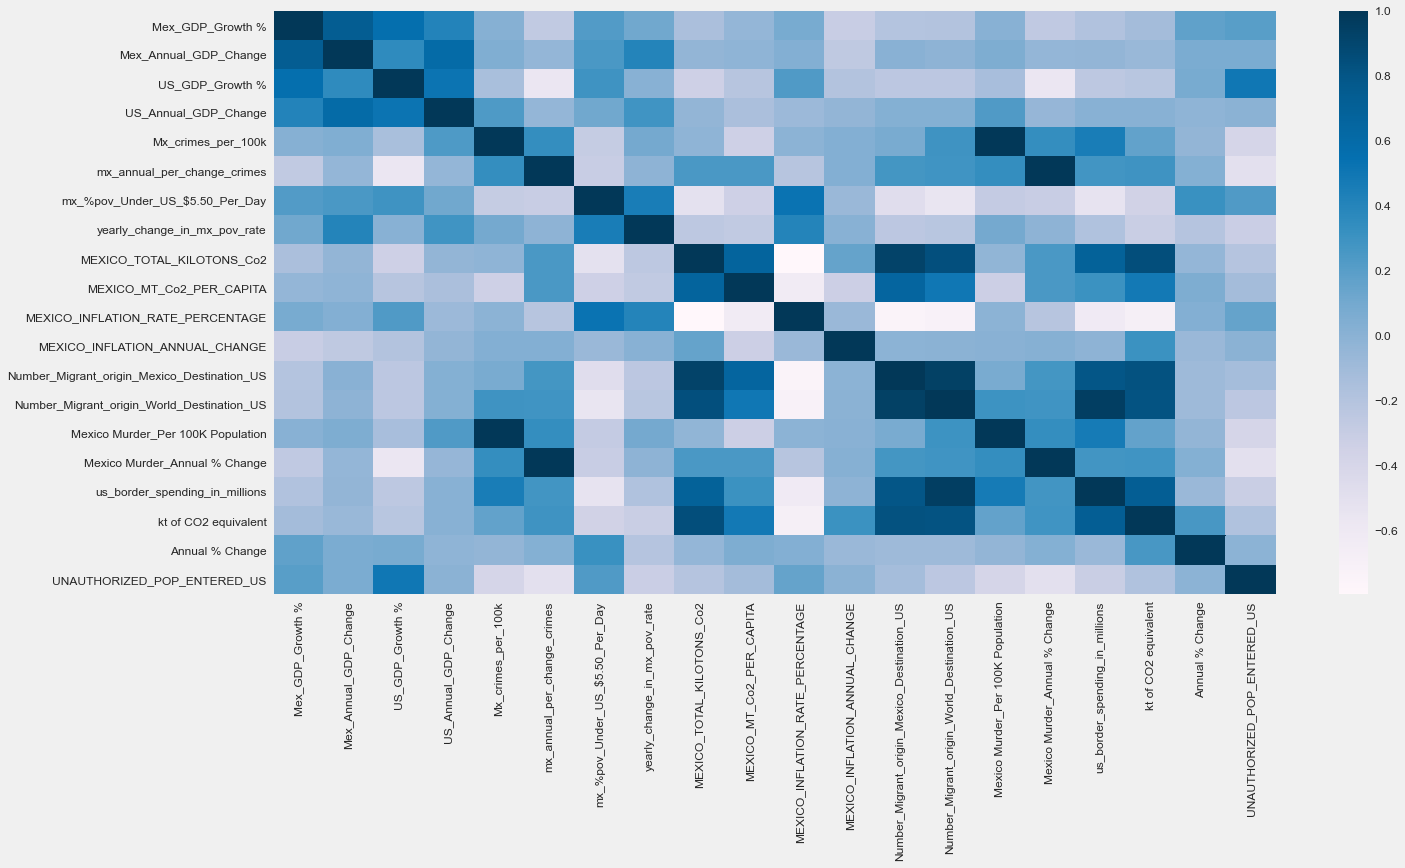

In [51]:
#plot a correlation matrix
corr = df1.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr,
            cmap='PuBu',
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.show()

In [52]:
#Identify x and y variables to start regression
x = df1[['Mex_GDP_Growth %', 'Mex_Annual_GDP_Change',
       'US_GDP_Growth %', 'US_Annual_GDP_Change', 'Mx_crimes_per_100k',
       'mx_annual_per_change_crimes', 'mx_%pov_Under_US_$5.50_Per_Day',
       'yearly_change_in_mx_pov_rate', 'MEXICO_TOTAL_KILOTONS_Co2',
       'MEXICO_MT_Co2_PER_CAPITA', 'MEXICO_INFLATION_RATE_PERCENTAGE',
       'MEXICO_INFLATION_ANNUAL_CHANGE',
       'Number_Migrant_origin_Mexico_Destination_US',
       'Number_Migrant_origin_World_Destination_US',
       'Mexico Murder_Per 100K Population', 'Mexico Murder_Annual % Change', 'us_border_spending_in_millions', 'kt of CO2 equivalent',
       'Annual % Change']]
y = df1.UNAUTHORIZED_POP_ENTERED_US

In [53]:
a, b, c, = 'chuck', 'fiona', 'rahel'
c

'rahel'

In [54]:
#Split the data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size = .15)

### Start regression modeling

In [55]:
#Start with GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators=1500)
regressor.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=1500)

In [56]:
y_pred = regressor.predict(x_test)

In [57]:
r2_score(y_test, y_pred)

0.30184326752731505

### Try linear Regression

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     UNAUTHORIZED_POP_ENTERED_US   R-squared (uncentered):                   0.983
Model:                                     OLS   Adj. R-squared (uncentered):              0.938
Method:                          Least Squares   F-statistic:                              21.87
Date:                         Sun, 08 Aug 2021   Prob (F-statistic):                    0.000181
Time:                                 15:14:42   Log-Likelihood:                         -335.99
No. Observations:                           26   AIC:                                      710.0
Df Residuals:                                7   BIC:                                      733.9
Df Model:                                   19                                                  
Covariance Type:                     nonrobust                                                  
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Mex_GDP_Growth %                            -1.291e+05   1.01e+05     -1.273      0.244   -3.69e+05    1.11e+05
Mex_Annual_GDP_Change                        2.109e+04   2.77e+04      0.761      0.471   -4.44e+04    8.66e+04
US_GDP_Growth %                              4.419e+05   2.87e+05      1.540      0.167   -2.36e+05    1.12e+06
US_Annual_GDP_Change                        -1.447e+05   1.03e+05     -1.399      0.205   -3.89e+05    9.99e+04
Mx_crimes_per_100k                           1.874e+06   1.22e+06      1.531      0.170   -1.02e+06    4.77e+06
mx_annual_per_change_crimes                 -1.695e+06   1.08e+06     -1.573      0.160   -4.24e+06    8.54e+05
mx_%pov_Under_US_$5.50_Per_Day               6166.8444   1.44e+04      0.427      0.682    -2.8e+04    4.03e+04
yearly_change_in_mx_pov_rate                 3.137e+04   4.42e+04      0.709      0.501   -7.32e+04    1.36e+05
MEXICO_TOTAL_KILOTONS_Co2                      -7.4318      5.887     -1.262      0.247     -21.352       6.488
MEXICO_MT_Co2_PER_CAPITA                    -3.036e+05   6.43e+05     -0.472      0.651   -1.82e+06    1.22e+06
MEXICO_INFLATION_RATE_PERCENTAGE            -2.817e+04   2.28e+04     -1.235      0.257   -8.21e+04    2.58e+04
MEXICO_INFLATION_ANNUAL_CHANGE              -1.565e+04   1.71e+04     -0.918      0.389    -5.6e+04    2.47e+04
Number_Migrant_origin_Mexico_Destination_US     0.6319      0.379      1.669      0.139      -0.263       1.527
Number_Migrant_origin_World_Destination_US     -0.2884      0.223     -1.292      0.237      -0.816       0.239
Mexico Murder_Per 100K Population           -1.856e+06   1.22e+06     -1.524      0.171   -4.73e+06    1.02e+06
Mexico Murder_Annual % Change                1.696e+06   1.08e+06      1.569      0.161   -8.59e+05    4.25e+06
us_border_spending_in_millions                572.9492    566.841      1.011      0.346    -767.418    1913.316
kt of CO2 equivalent                           13.4901     12.228      1.103      0.306     -15.424      42.404
Annual % Change                              -6.77e+04   5.34e+04     -1.267      0.246   -1.94e+05    5.87e+04
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.473
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.351
Skew:                           0.552   Prob(JB):                        0.509
Kurtosis:                       3.166   Cond. No.                     2.51e+09
==========================

In [61]:
#check fopr multi-colinearity
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

                                        feature           VIF
0                              Mex_GDP_Growth %     16.275758
1                         Mex_Annual_GDP_Change      7.805647
2                               US_GDP_Growth %     20.740780
3                          US_Annual_GDP_Change      4.036882
4                            Mx_crimes_per_100k  39326.682021
5                   mx_annual_per_change_crimes  15983.187403
6                mx_%pov_Under_US_$5.50_Per_Day    103.407751
7                  yearly_change_in_mx_pov_rate      3.116990
8                     MEXICO_TOTAL_KILOTONS_Co2   1276.985657
9                      MEXICO_MT_Co2_PER_CAPITA   2134.160027
10             MEXICO_INFLATION_RATE_PERCENTAGE      9.912932
11               MEXICO_INFLATION_ANNUAL_CHANGE      8.844640
12  Number_Migrant_origin_Mexico_Destination_US   1158.019363
13   Number_Migrant_origin_World_Destination_US   7197.865156
14            Mexico Murder_Per 100K Population  40452.634639
15      

### NORMALIZATION

In [62]:
#Normalize the data since the values are very different, and there are no normal distrubtions
scaler = MinMaxScaler()

In [63]:
df1_normal=pd.DataFrame(scaler.fit_transform(df1),
            columns=df1.columns, index=df1.index) 
df1_normal

,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change,us_border_spending_in_millions,kt of CO2 equivalent,Annual % Change,UNAUTHORIZED_POP_ENTERED_US
0,0.791340,0.578427,0.851783,0.319563,0.376048,0.269610,0.439276,0.329572,0.244244,0.924467,0.535564,0.000000,0.677321,0.572558,0.423784,0.283493,0.431767,0.000000,0.462921,0.339181
1,0.872805,0.506381,0.606694,0.162819,0.436448,0.269610,0.421189,0.329572,0.000000,0.197017,0.741390,0.824930,0.000000,0.000000,0.436448,0.283493,0.000000,0.095093,0.504028,0.429412
2,0.799659,0.422808,0.333128,0.138518,0.456769,0.262252,0.421189,0.329572,0.076062,0.304437,0.617801,0.737928,0.064288,0.038675,0.456769,0.262252,0.008949,0.145427,0.459203,0.262971
3,0.748381,0.434747,0.831166,0.821385,0.521980,0.335138,0.594315,0.607004,0.091460,0.258123,0.396153,0.712064,0.128575,0.077350,0.521980,0.335138,0.015660,0.097352,0.370171,0.173419
4,0.626605,0.396459,0.725597,0.286756,0.476225,0.158129,0.421189,0.329572,0.118278,0.241877,0.217819,0.723441,0.192863,0.116024,0.476225,0.158129,0.024857,0.131487,0.444330,0.171432
5,0.854941,0.585838,0.900631,0.535844,0.450916,0.187283,0.583979,0.357977,0.193103,0.342022,0.131517,0.747749,0.257151,0.154699,0.450916,0.187283,0.034054,0.214158,0.487709,0.314143
6,0.000000,0.000000,0.716200,0.217497,0.425306,0.185617,0.421189,0.329572,0.080886,0.000000,1.000000,1.000000,0.321439,0.193374,0.425306,0.185617,0.046980,0.194685,0.396199,0.435040
7,0.994398,1.000000,0.865473,0.512758,0.355627,0.108982,1.000000,1.000000,0.157339,0.106814,0.980764,0.765510,0.387064,0.240698,0.355627,0.108982,0.075814,0.271595,0.480479,0.369619
8,1.000000,0.465212,0.958025,0.461725,0.296039,0.116618,0.421189,0.329572,0.288603,0.336324,0.554700,0.658046,0.452690,0.288023,0.296039,0.116618,0.112851,0.300508,0.437719,0.372523
9,0.871899,0.393166,0.962716,0.383961,0.290922,0.217548,0.793282,0.062257,0.397193,0.508851,0.409180,0.732117,0.518316,0.335347,0.290922,0.217548,0.152622,1.000000,1.000000,0.566440


In [64]:
df1_normal.to_csv('normalized.csv')

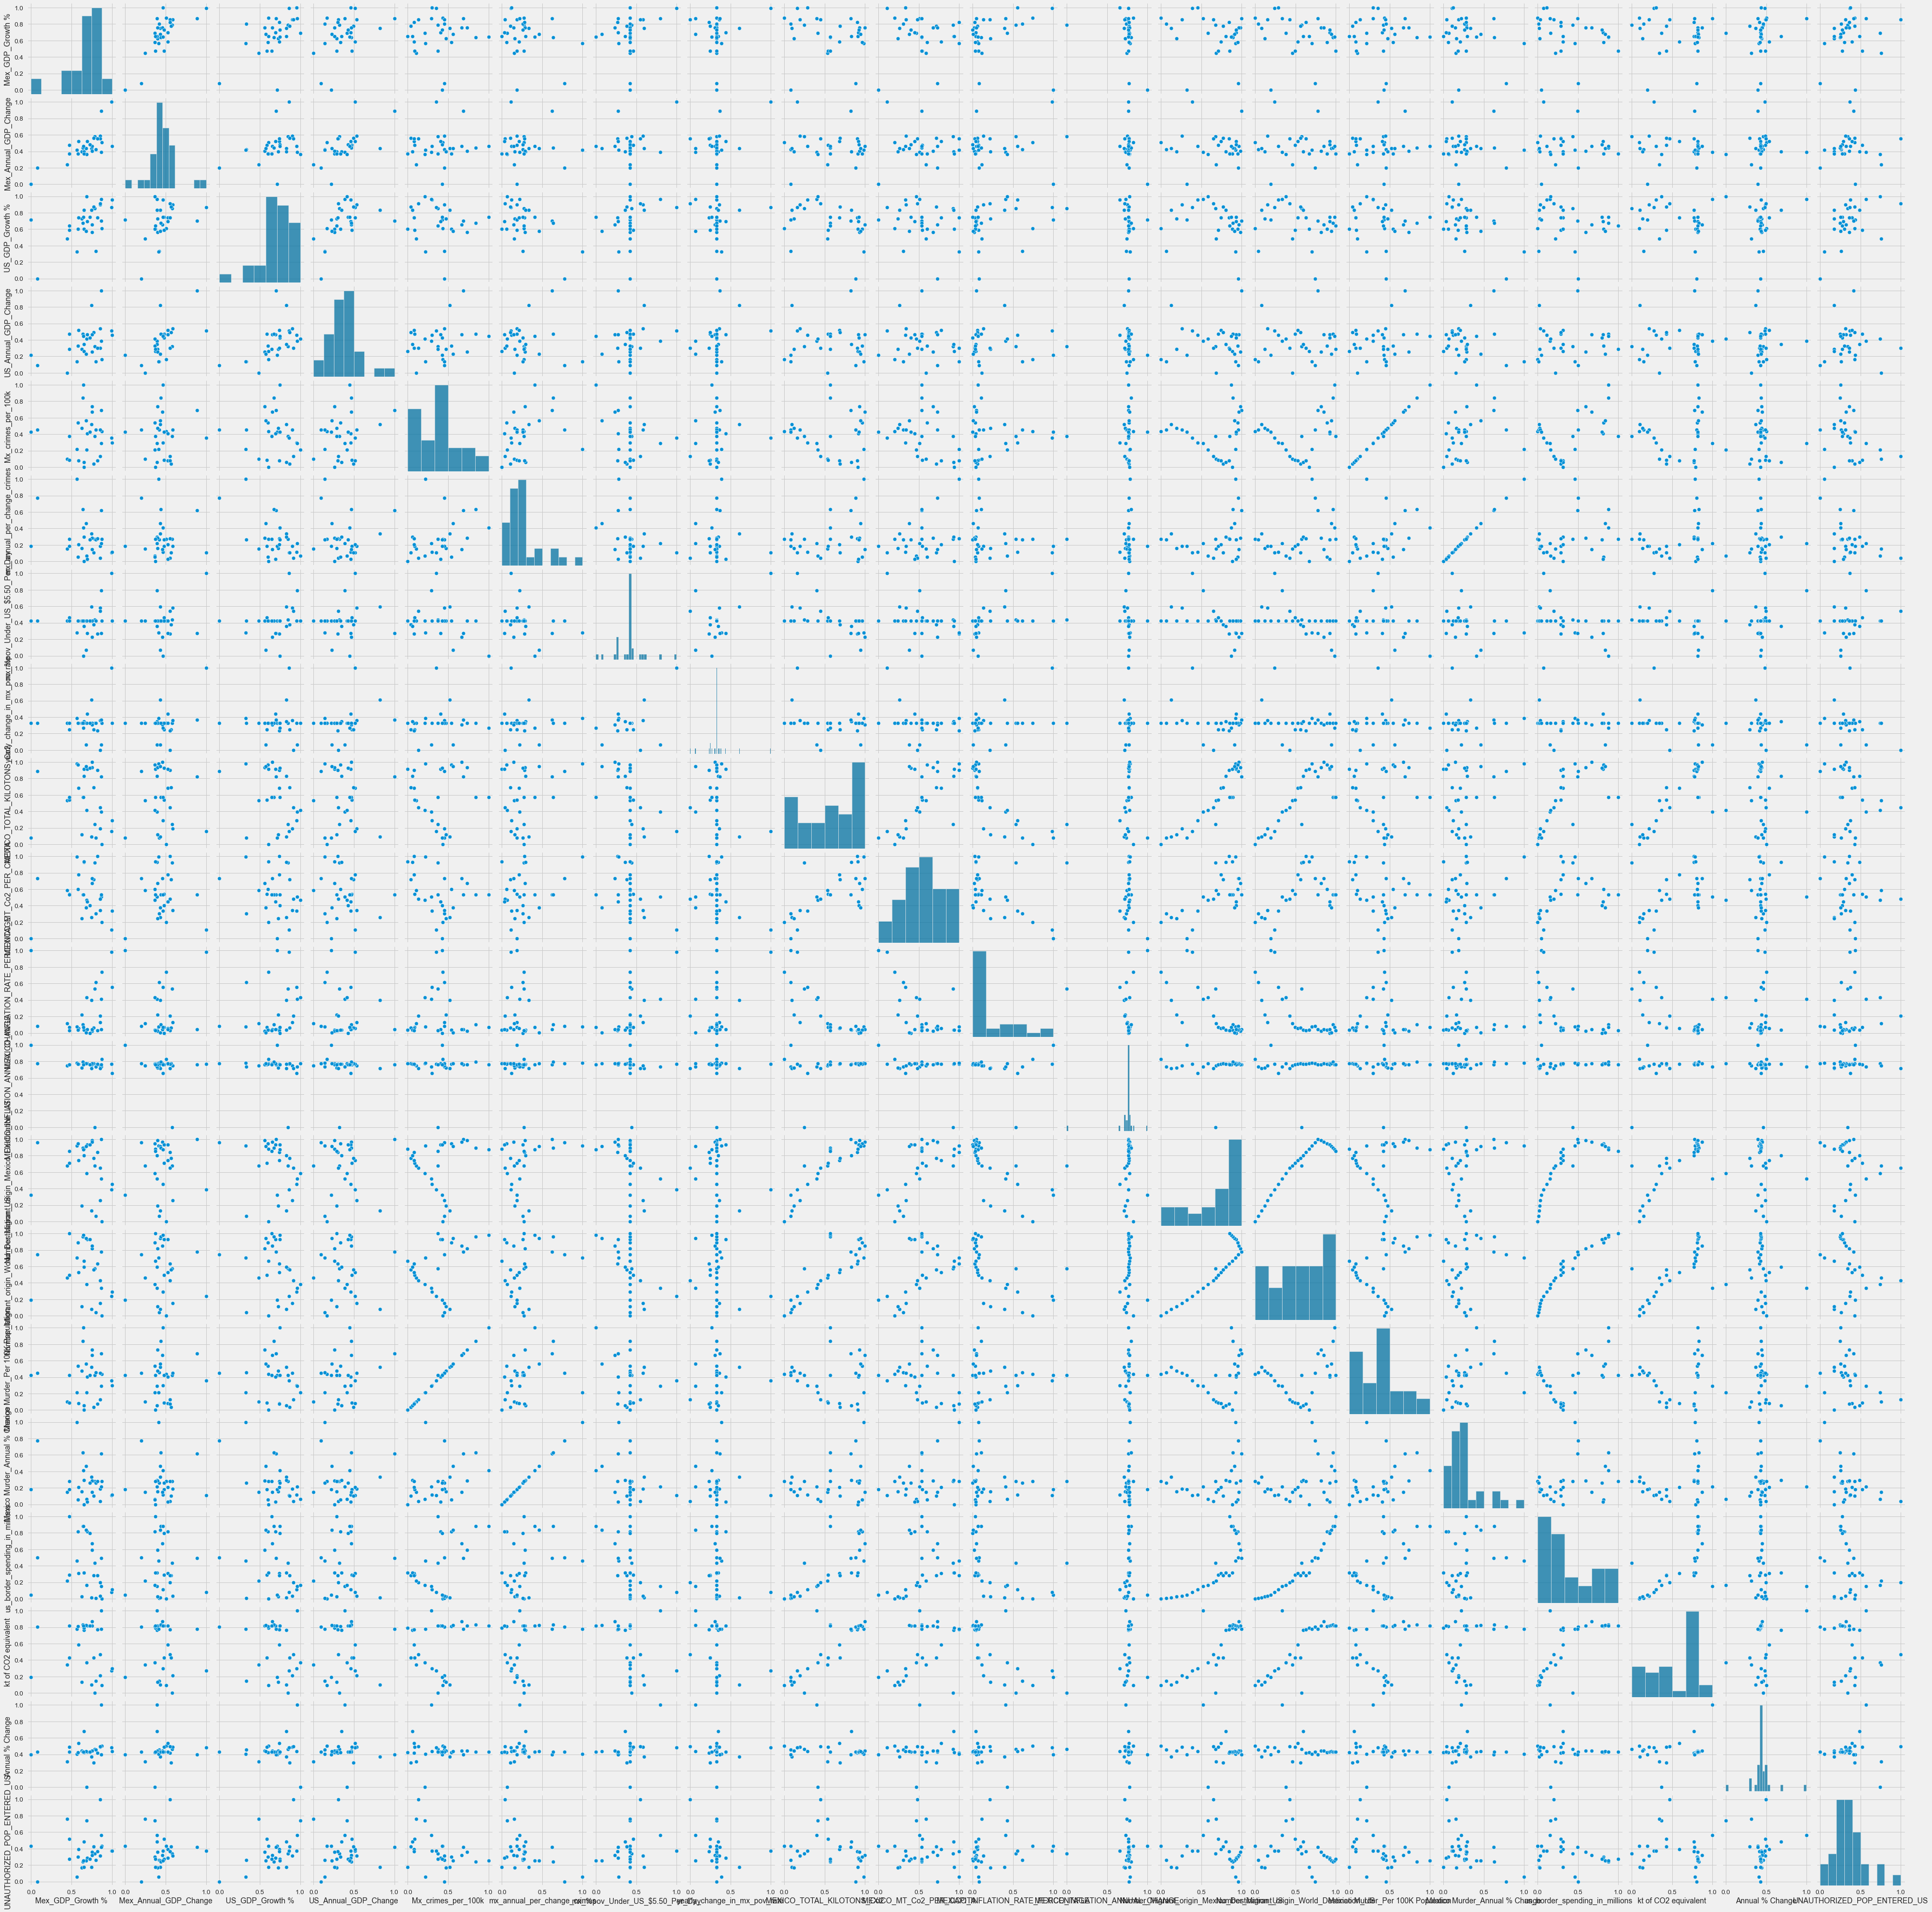

In [65]:
#Plot a pairplot to understand dataspread
sns.pairplot(df1_normal)

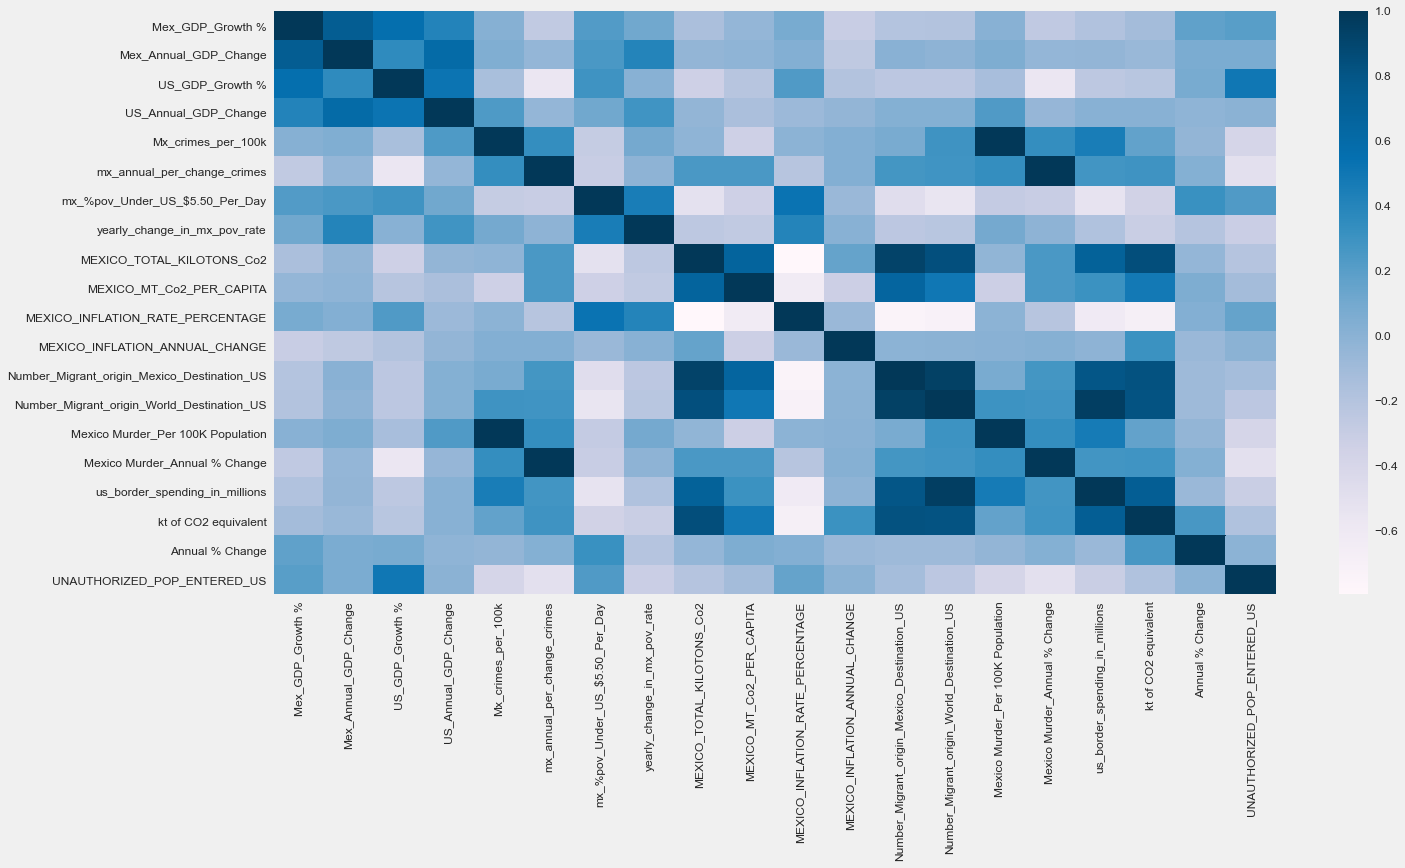

In [66]:
#plot a correlation matrix
corr = df1.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr,
            cmap='PuBu',
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.show()

In [67]:
#DEclare new variables
x_norm = df1_normal[['Mex_GDP_Growth %', 'Mex_Annual_GDP_Change',
       'US_GDP_Growth %', 'US_Annual_GDP_Change', 'Mx_crimes_per_100k',
       'mx_annual_per_change_crimes', 'mx_%pov_Under_US_$5.50_Per_Day',
       'yearly_change_in_mx_pov_rate', 'MEXICO_TOTAL_KILOTONS_Co2',
       'MEXICO_MT_Co2_PER_CAPITA', 'MEXICO_INFLATION_RATE_PERCENTAGE',
       'MEXICO_INFLATION_ANNUAL_CHANGE',
       'Number_Migrant_origin_Mexico_Destination_US',
       'Number_Migrant_origin_World_Destination_US',
       'Mexico Murder_Per 100K Population', 'Mexico Murder_Annual % Change', 'us_border_spending_in_millions', 'kt of CO2 equivalent',
       'Annual % Change']]
y_norm = df1_normal.UNAUTHORIZED_POP_ENTERED_US

In [68]:
#check fopr multi-colinearity
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x_norm.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_norm.values, i)
                          for i in range(len(x_norm.columns))]
  
print(vif_data)

                                        feature           VIF
0                              Mex_GDP_Growth %     89.622760
1                         Mex_Annual_GDP_Change     64.412853
2                               US_GDP_Growth %     67.430910
3                          US_Annual_GDP_Change     18.898188
4                            Mx_crimes_per_100k  10669.392210
5                   mx_annual_per_change_crimes  36798.092294
6                mx_%pov_Under_US_$5.50_Per_Day     35.074525
7                  yearly_change_in_mx_pov_rate     23.006289
8                     MEXICO_TOTAL_KILOTONS_Co2    130.384913
9                      MEXICO_MT_Co2_PER_CAPITA     41.949266
10             MEXICO_INFLATION_RATE_PERCENTAGE      9.338450
11               MEXICO_INFLATION_ANNUAL_CHANGE     35.975475
12  Number_Migrant_origin_Mexico_Destination_US    902.011644
13   Number_Migrant_origin_World_Destination_US   1980.115166
14            Mexico Murder_Per 100K Population  10917.441473
15      

In [69]:
#Declare new variables
x_norm1 = df1_normal[['Mex_GDP_Growth %', 'Mex_Annual_GDP_Change',
       'US_GDP_Growth %', 'US_Annual_GDP_Change',
       'MEXICO_MT_Co2_PER_CAPITA', 'MEXICO_INFLATION_RATE_PERCENTAGE',
       'MEXICO_INFLATION_ANNUAL_CHANGE']]
y_norm = df1_normal.UNAUTHORIZED_POP_ENTERED_US

In [70]:
#Split the data into training data and testing data
x1_train, x1_test, y1_train, y1_test = train_test_split(x_norm1,y_norm, random_state=0, test_size = .15)

In [71]:
#try with using x as a constant
model = sm.OLS(y1_train, x1_train).fit()
predictions = model.predict(x1_train) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     UNAUTHORIZED_POP_ENTERED_US   R-squared (uncentered):                   0.856
Model:                                     OLS   Adj. R-squared (uncentered):              0.804
Method:                          Least Squares   F-statistic:                              16.20
Date:                         Sun, 08 Aug 2021   Prob (F-statistic):                    8.79e-07
Time:                                 15:16:33   Log-Likelihood:                          11.609
No. Observations:                           26   AIC:                                     -9.218
Df Residuals:                               19   BIC:                                    -0.4114
Df Model:                                    7                                                  
Covariance Type:                     nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Mex_GDP_Growth %                    -0.1736      0.322     -0.539      0.596      -0.847       0.500
Mex_Annual_GDP_Change                0.3371      0.376      0.896      0.381      -0.450       1.124
US_GDP_Growth %                      0.7773      0.279      2.786      0.012       0.193       1.361
US_Annual_GDP_Change                -0.5754      0.268     -2.147      0.045      -1.136      -0.014
MEXICO_MT_Co2_PER_CAPITA            -0.0965      0.145     -0.666      0.513      -0.400       0.207
MEXICO_INFLATION_RATE_PERCENTAGE    -0.1409      0.168     -0.841      0.411      -0.492       0.210
MEXICO_INFLATION_ANNUAL_CHANGE       0.1082      0.140      0.771      0.450      -0.185       0.402
==============================================================================
Omnibus:                        9.872   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.032
Skew:                           1.168   Prob(JB):                       0.0180
Kurtosis:                       4.400   Cond. No.                         22.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

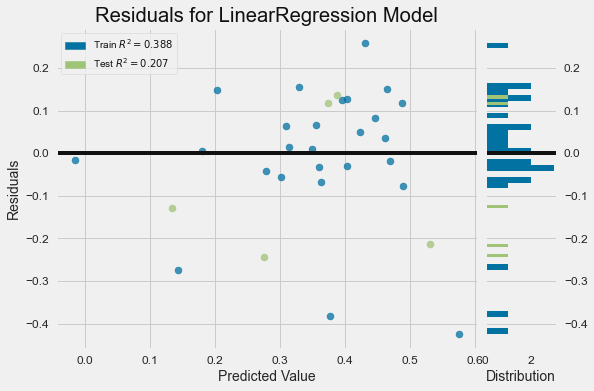

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [72]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(x1_train, y1_train)
visualizer.score(x1_test, y1_test)
visualizer.show()

### TEST THE MODEL

In [73]:
import statsmodels.formula.api as smf


model = smf.ols('y1_train ~ x1_train', data=df1_normal).fit()

# Predict for a list of observations, list length can be 1 to many..**
prediction = model.get_prediction(exog=dict(x=[1,10,2,7,4,3,3])) 
prediction.summary_frame(alpha=0.05)

PatsyError: Number of rows mismatch between data argument and y1_train (31 versus 26)
    y1_train ~ x1_train
    ^^^^^^^^